In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))

import Utils.preprocessing
import Utils.augmentation
import Utils.plotting

## 📥 Obtención y descarga de datos

En este proyecto utilizaremos el conjunto de datos **LibriSpeech**, un corpus ampliamente usado para tareas de reconocimiento de voz y procesamiento de audio.

El proceso consiste en:

1. **Selección del subset**  
   Elegimos el subset `dev-clean`, que contiene grabaciones de voz limpia, ideal para experimentos iniciales y pruebas de reducción de ruido.

2. **Descarga**  
   Utilizamos una función utilitaria (`download_and_extract`) para descargar el archivo comprimido desde el repositorio oficial y guardarlo en la carpeta `data/`.

3. **Desempaquetado**  
   Extraemos el contenido del archivo `.tar.gz`, manteniendo la estructura original de LibriSpeech:  
   - Carpeta por cada hablante  
   - Archivos `.flac` con el audio  
   - Archivos `.txt` con las transcripciones

4. **Verificación**  
   Confirmamos que los archivos se hayan descargado y extraído correctamente antes de pasar a la etapa de preprocesamiento.

> 💡 Más adelante, estos audios serán convertidos y utilizados para añadir ruido y probar algoritmos de reducción de ruido.



In [ ]:
clean_audio_corpus = ["https://www.openslr.org/resources/12/dev-clean.tar.gz"]

for audio in clean_audio_corpus:
  Utils.preprocessing.download_and_extract(audio, "../Audios/Dataset")

## 🎛️ Data Augmentation

Para mejorar la robustez del modelo y simular condiciones reales, aplicaremos un **aumento de datos** (*data augmentation*) que consiste en **escalar y añadir ruido** a las formas de onda (*waveforms*) de acuerdo con una relación señal-ruido (*Signal-to-Noise Ratio*, SNR) específica.

### 📌 Proceso
Para cada par de vectores:
- **Señal original**: \( x \)
- **Ruido generado**: \( n \)

La señal resultante \( y \) se calcula como:

\[
y = x + \alpha \cdot n
\]

donde \( \alpha \) es un factor de escala tal que se cumpla el SNR deseado.

---

### 📐 Definición de SNR
El **SNR** (relación señal-ruido) se define como:

\[
\mathrm{SNR} = \frac{P_{signal}}{P_{noise}}
\]

En decibelios (dB):

\[
\mathrm{SNR_{dB}} = 10 \log_{10} \left( \mathrm{SNR} \right)
\]

donde:
- \( P_{signal} \) es la potencia media de la señal
- \( P_{noise} \) es la potencia media del ruido

---

💡 **Nota:**  
En nuestra implementación, generaremos ruido blanco y lo escalaremos de acuerdo con el SNR especificado. Este proceso permite:
- Evaluar la robustez de algoritmos de reducción de ruido
- Simular ambientes con diferentes niveles de interferencia
- Mejorar la generalización del modelo


In [ ]:
input_folder = "../Audios/Dataset/dev-clean"
output_folder = "../Audios/Augmented Audios"

snr_levels = [20, 10, 3]

for snr in snr_levels:
  Utils.augmentation.add_noise(input_folder, output_folder, snr)


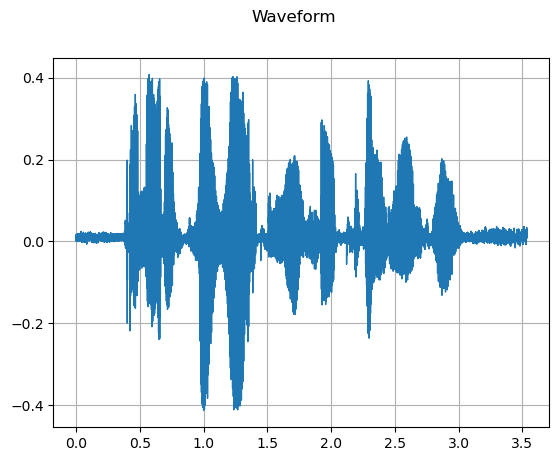

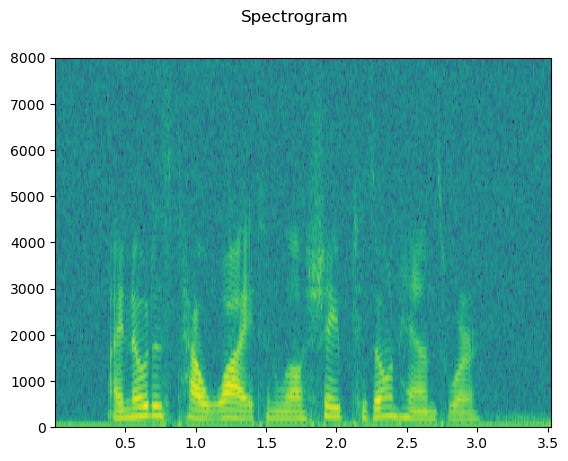

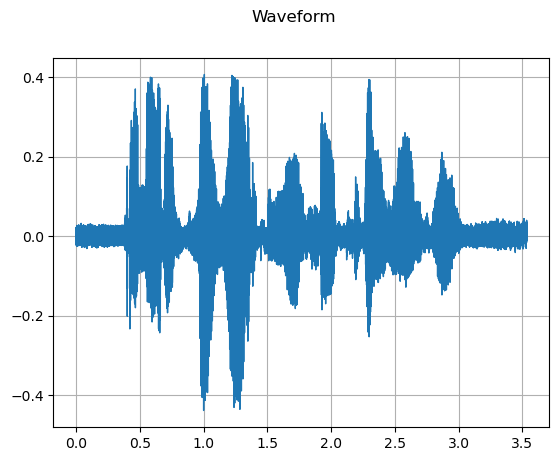

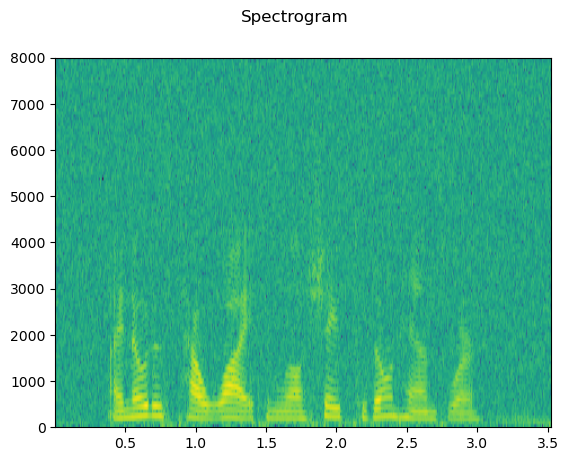

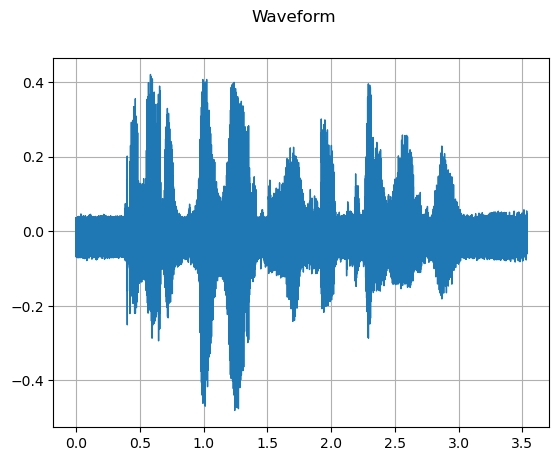

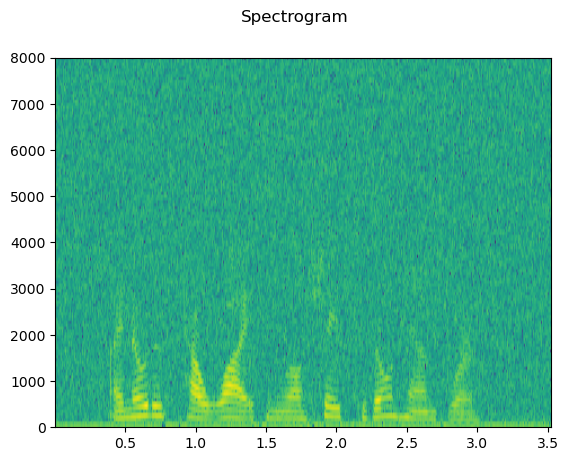

In [5]:
import random
import torch
import torchaudio
from pathlib import Path

snr20 = list(Path("../Audios/Augmented Audios 20 SNR").rglob("*.flac"))
snr10 = list(Path("../Audios/Augmented Audios 10 SNR").rglob("*.flac"))
snr3 = list(Path("../Audios/Augmented Audios 3 SNR").rglob("*.flac"))
index = random.randint(0, len(snr20))

files = [str(snr20[index]), str(snr10[index]), str(snr3[index])]

for file in files:
  data, sr = torchaudio.load(file)
  Utils.plotting.plot_waveform(data, sr)
  Utils.plotting.plot_specgram(data, sr)
  